In [25]:
import pandas as pd
from gensim.models import Word2Vec, KeyedVectors
import copy
import numpy as np
import nltk
import matplotlib.pyplot as plt

In [7]:
#constantes:
num_clusters = 700

In [8]:
#pegando o dataframe
df = pd.read_csv('data/laptop_filtered_aspect_sample.csv')
df

,aspect_name
0,laptop
1,use
2,computer
3,screen
4,price
...,...
7330,cool feature
7331,professional laptop
7332,professional life
7333,professional look


In [9]:
words = df.values.tolist()
clean_words = []
clean_vector = []
for word in words:
    clean_words.append(nltk.word_tokenize(word[0]))
for word in words:
    clean_vector.append(word[0].split(" "))

In [10]:
#treinando o modelo de wordvec
model = Word2Vec(sg=0, ns_exponent=0.75,min_count=1, size=32)
model.build_vocab(clean_words, progress_per=10000)
model.train(clean_words, total_examples=model.corpus_count, epochs=30, report_delay=1)

(331672, 360450)

In [11]:
np_vector = []
np_label = []
for vec in clean_vector:
    count = 0
    string = ''
    aux = []
    exist = False
    for word in vec:
        if word in  model.wv.vocab:
            string += word + ' '
            aux.append(model[word])
            exist = True
    if exist:
        aux = sum(aux)/len(aux)
        np_vector.append(aux)
        np_label.append(string)

C:\Users\Laura\Anaconda3\envs\pnl\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


In [52]:
#colocando o modelo do TSNE
from sklearn.manifold import TSNE
SNEt = TSNE(n_components=2, random_state=1)
tsne_data = SNEt.fit_transform(np_vector)

In [53]:
tsne_word = []
for key, tupla in enumerate(tsne_data):
    tsne_word.append(tsne_data[key].tolist())
    tsne_word[key].append(np_label[key])
tsne_word

[[47.330440521240234, -58.85630798339844, 'laptop '],
 [63.768394470214844, -30.218643188476562, 'use '],
 [48.4713134765625, -57.359954833984375, 'computer '],
 [47.82966232299805, -58.14945983886719, 'screen '],
 [56.9069709777832, -49.34882736206055, 'price '],
 [50.58868408203125, -51.20685577392578, 'keyboard '],
 [59.66948699951172, -19.01461410522461, 'work '],
 [47.26063919067383, -57.87091827392578, 'battery '],
 [60.81756591796875, -9.72896671295166, 'product '],
 [66.46048736572266, -30.662288665771484, 'fast '],
 [62.90374755859375, -27.577011108398438, 'time '],
 [55.69110107421875, -36.680137634277344, 'battery life '],
 [36.00201416015625, 21.38068199157715, 'notebook '],
 [68.1376724243164, -22.34415626525879, 'easy '],
 [-53.24833679199219, 2.8707239627838135, 'purchase '],
 [-34.93587112426758, -59.84992980957031, 'works '],
 [57.44745635986328, 18.04995346069336, 'performance '],
 [36.25220489501953, 21.075098037719727, 'com '],
 [65.0000228881836, -8.53780460357666,

In [54]:
sne_pd = pd.DataFrame(tsne_word, columns=['X','Y','Word'])
sne_pd

,X,Y,Word
0,47.330441,-58.856308,laptop
1,63.768394,-30.218643,use
2,48.471313,-57.359955,computer
3,47.829662,-58.149460,screen
4,56.906971,-49.348827,price
...,...,...,...
7322,-67.008064,10.411288,cool feature
7323,58.298332,-15.051620,professional laptop
7324,-6.394046,42.782654,professional life
7325,-58.506351,6.147218,professional look


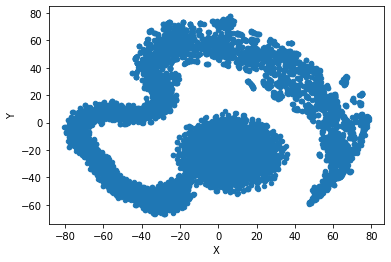

In [55]:
sne_pd.plot.scatter(x='X',y='Y')
plt.show()

In [56]:
#usando k-means
from sklearn.cluster import KMeans
%matplotlib inline

In [57]:
#testando agora com a clusterizacao depois do tsne

In [58]:
#treinando o modelo
clustering = KMeans(n_clusters=num_clusters, random_state=0)
clustering.fit(sne_pd[['X','Y']])
predictClusterKMeans = clustering.predict(sne_pd[['X','Y']])

In [59]:
#achando os centroides
centersKmeans = clustering.cluster_centers_
centersKmeans = pd.DataFrame(centersKmeans,columns=['X','Y'])
centersKmeans.head(5)

,X,Y
0,-51.586541,7.479099
1,26.660855,-13.145309
2,4.919804,44.112705
3,-29.918369,-51.469394
4,64.130143,7.913515


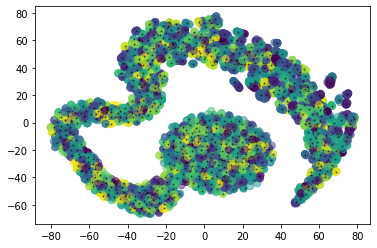

In [60]:
#plotando a resposta
plt.scatter(sne_pd['X'], sne_pd['Y'], c=predictClusterKMeans, s=50, alpha=0.5)
plt.scatter(centersKmeans['X'], centersKmeans['Y'], c='black', s=1, alpha=0.5)
plt.show()


In [61]:
sne_pd['Group'] = predictClusterKMeans
sne_pd.head()

,X,Y,Word,Group
0,47.330441,-58.856308,laptop,121
1,63.768394,-30.218643,use,27
2,48.471313,-57.359955,computer,121
3,47.829662,-58.149460,screen,121
4,56.906971,-49.348827,price,219


In [80]:
sne_pd.loc[sne_pd['Group'] == 494]

,X,Y,Word,Group
148,22.866333,47.035583,port,494
1515,22.706095,46.518623,sd,494
3232,21.171555,46.933830,great cost benefit,494
4049,19.400621,47.306675,internet é,494
4062,19.773643,45.450287,fast typing,494
4542,19.466198,47.323547,internet search,494
4859,20.235844,45.312984,relatively fast,494
6242,20.197044,45.338230,also fast,494
6513,19.945894,45.431400,fast charge,494
6625,23.051674,46.888741,sd port,494


In [88]:
sne_pd = sne_pd.sort_values('Group')
sne_pd.head(10)

,X,Y,Word,Group
5673,-50.452614,8.087364,problem #,0
2417,-52.441265,7.484088,speaker sound,0
2454,-51.133945,5.980472,n't compatible,0
6915,-51.690895,9.181862,i9 version,0
4745,-50.945774,8.231737,overall rating,0
6139,-50.869106,8.161140,s installed,0
1372,-52.275875,6.662011,wireless printer,0
2263,-50.791790,7.805996,flash drives,0
4263,-52.577675,7.479902,sound volume,0
7297,-52.166782,8.692144,cpu temperatures,0


PermissionError: [Errno 13] Permission denied: 'answer.csv'

In [95]:
import glob
files_present = False
while(not files_present):
    name = input('nome que deseja para o arquivo resposta:')
    filename = name + '.csv'
    files_present = glob.glob(filename)
    if not files_present:
        sne_pd.to_csv(filename, encoding='utf-8', index=False, columns=['Word','Group'])
    else:
        print('Esse Arquivo Já Existe, Tente novamente') 
        


nome que deseja para o arquivo resposta:resposta
nome que deseja para o arquivo resposta:resposta
Esse Arquivo Já Existe, Tente novamente


NameError: name 'clusteringFirst' is not defined

,X,Y
0,-12.458729,79.977226
1,-37.039921,57.506691
2,-13.862880,78.773529
3,-13.074478,79.401512
4,-24.055494,72.964653
...,...,...
7322,23.934101,-64.390694
7323,-39.697456,41.522041
7324,23.840078,-27.748844
7325,27.592096,-56.580265
